In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report


In [2]:
# load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# display basic information about the dataset
print("Dataset Shape:", df.shape)
print("Dataset Info:")
df.info()

Dataset Shape: (7043, 21)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pa

In [4]:
# check for missing values
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# handle missing values in 'TotalCharges' column by converting to numeric and dropping NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
print("\nDataset Shape after cleaning:", df.shape)



Dataset Shape after cleaning: (7032, 21)


In [6]:
# display target distribution
print("\nTarget Distribution:\n", df['Churn'].value_counts())



Target Distribution:
 Churn
No     5163
Yes    1869
Name: count, dtype: int64


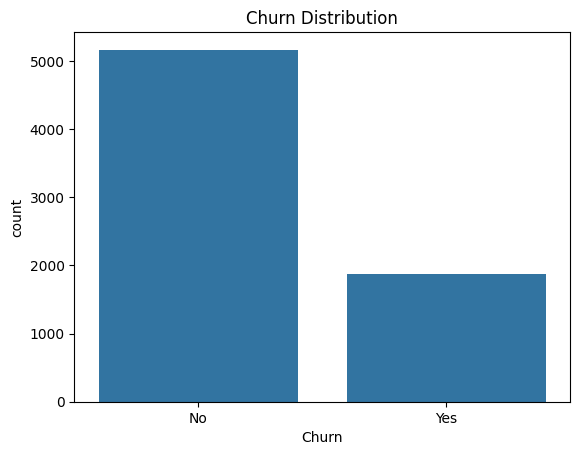

In [7]:
# plot target distribution
plt.figure()
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


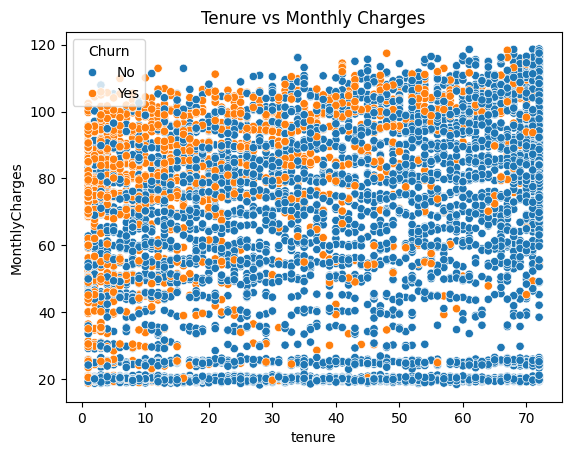

In [8]:
# plot tenure vs monthly charges colored by churn status
plt.figure()
sns.scatterplot(
    x=df['tenure'],
    y=df['MonthlyCharges'],
    hue=df['Churn']
)
plt.title("Tenure vs Monthly Charges")
plt.show()


In [9]:
# create a new feature: Average Monthly Spend
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'] + 1)


In [10]:
# prepare data for clustering
cluster_features = df[['tenure', 'MonthlyCharges', 'AvgMonthlySpend']]


In [11]:
print("\nPrepared cluster features head:\n", cluster_features.head())


Prepared cluster features head:
    tenure  MonthlyCharges  AvgMonthlySpend
0       1           29.85        14.925000
1      34           56.95        53.985714
2       2           53.85        36.050000
3      45           42.30        40.016304
4       2           70.70        50.550000


In [13]:
# standardize features and apply KMeans clustering
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['ClusterID'] = kmeans.fit_predict(cluster_scaled)
print("\nCluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Counts:\n", df['ClusterID'].value_counts())




Cluster Centers:
 [[ 0.9156448  -1.04126206 -0.85992596]
 [-0.72756156  0.43823766  0.2541723 ]
 [-0.90816055 -1.14039681 -1.16341832]
 [ 0.99660198  0.95703405  1.07683435]]

Cluster Counts:
 ClusterID
1    2243
3    2084
2    1601
0    1104
Name: count, dtype: int64


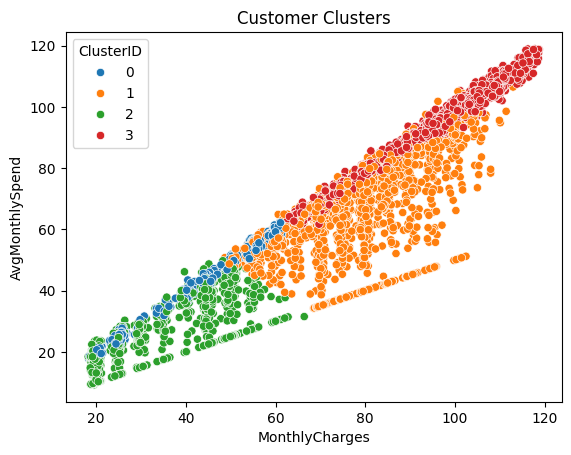

In [14]:
# plot clusters
plt.figure()
sns.scatterplot(
    x=df['MonthlyCharges'],
    y=df['AvgMonthlySpend'],
    hue=df['ClusterID'],
    palette='tab10'
)
plt.title("Customer Clusters")
plt.show()


In [15]:
# prepare features and target variable
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn'].map({'Yes': 1, 'No': 0})


In [16]:
# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
print (X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(5625, 21) (1407, 21) (5625,) (1407,)


In [18]:
# preprocess categorical and numerical features
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)


In [20]:
# logistic regression without clustering feature
X_no_cluster = X.drop(columns=['ClusterID'])

X_train_nc, X_val_nc, y_train_nc, y_val_nc = train_test_split(
    X_no_cluster, y, test_size=0.2, random_state=42, stratify=y
)

model_no_cluster = Pipeline(steps=[
    ('preprocess', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'),
         X_no_cluster.select_dtypes(include='object').columns),
        ('num', StandardScaler(),
         X_no_cluster.select_dtypes(exclude='object').columns)
    ])),
    ('clf', LogisticRegression(max_iter=1000))
])

model_no_cluster.fit(X_train_nc, y_train_nc)




Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'AvgMonthlySpend'],
      dtype='object'))])),
                ('clf', LogisticRegression(max_iter=1000))])

In [21]:
# evaluate logistic regression without clustering feature
pred_nc = model_no_cluster.predict(X_val_nc)
print("\nLogistic Regression without Clustering Feature:")
print("Accuracy:", accuracy_score(y_val_nc, pred_nc))   



Logistic Regression without Clustering Feature:
Accuracy: 0.8002842928216063


In [22]:
# calculate F1 score and classification report
f1_nc = f1_score(y_val_nc, pred_nc)
print("F1 Score:", f1_nc)
print("Classification Report:\n", classification_report(y_val_nc, pred_nc))


F1 Score: 0.597997138769671
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [23]:
# logistic regression with clustering feature
model_cluster = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

model_cluster.fit(X_train, y_train)




Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'AvgMonthlySpend', 'ClusterID'],
      dtype='object'))])),
                ('clf', LogisticRegression(max_iter=1000))])

In [24]:
# calculate predictions with clustering feature
pred_c = model_cluster.predict(X_val)




In [25]:
# calculate F1 score and classification report
f1_c = f1_score(y_val, pred_c)
print("\nLogistic Regression with Clustering Feature:")
print("Accuracy:", accuracy_score(y_val, pred_c))
print("F1 Score:", f1_c)
print("Classification Report:\n", classification_report(y_val, pred_c))




Logistic Regression with Clustering Feature:
Accuracy: 0.8002842928216063
F1 Score: 0.597997138769671
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [26]:
print("F1 Score WITHOUT Cluster Feature:", round(f1_nc, 4))
print("F1 Score WITH Cluster Feature   :", round(f1_c, 4))


F1 Score WITHOUT Cluster Feature: 0.598
F1 Score WITH Cluster Feature   : 0.598


## summary
###  F1 Score WITHOUT Cluster Feature: 0.598 equal to F1 Score WITH Cluster Feature   : 0.598 so we can say that the logistic regression with cluster id not improving the churn pridiction .